In [36]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt

# @param dfFile: pandas.DataFrame ('nba_preprocessed.csv')
# @param dateStart, dateEnd: str in the format of 'YYYY-MM-DD'
# @param attriToDrop: list[str]
# @return X, Y: pandas.DataFrame
# featureExtraction() outputs X, Y for model training.
# Game date can be assigned
# Attribute to be dropped can be assigned
def featureExtraction(dfFile, dateStart='1000-01-01', dateEnd='2999-12-31', attriToDrop=None):
    df = pd.read_csv(dfFile)
    
    # Date selection
    df = df.loc[(df.Date_A > dateStart) & (df.Date_A < dateEnd), :].reset_index(drop=True)
    
    # Get label Y
    Y = df[['W/L_A']]
    Y = Y.rename(columns={'W/L_A': 'Label'})
    
    # Get attributes X
    colToDrop = ['Team_A', 'Date_A', 'W/L_A', 'Score_A', 'Opponent_A', 'Team_B', 'Date_B', 'W/L_B', 'Home/Away_B', 'Score_B', 'Opponent_B']
    colToDrop += attriToDrop if attriToDrop else []
    X = df.drop(columns = colToDrop)
    
    return X, Y

In [37]:
dfFile = '../../python_ex/NBA_Ino_Part/nba_preprocessed.csv'
dateStart = '2017-10-01'
dateEnd = '2018-04-30'
# X, Y = featureExtraction(dfFile, dateStart, dateEnd)
X, Y = featureExtraction(dfFile, attriToDrop=['PTS_A', 'PTS_B'], dateStart=dateStart, dateEnd=dateEnd)
# X, Y = featureExtraction(dfFile)

In [38]:
X.head()

,Home/Away_A,FG%_A,FGM_A,FGA_A,3P%_A,3PM_A,3PA_A,FT%_A,FTM_A,FTA_A,...,FTM_B,FTA_B,REB_B,OREB_B,DREB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B
0,0,0.468,36,77,0.481,13,27,0.917,11,12,...,15,16,36,6,30,28,9,5,15,18
1,1,0.435,37,85,0.333,10,30,0.600,12,20,...,9,13,39,12,27,15,6,3,13,21
2,1,0.488,39,80,0.348,8,23,0.783,18,23,...,26,28,38,10,28,24,13,3,15,24
3,0,0.384,38,99,0.258,8,31,0.600,9,15,...,21,26,49,9,40,18,5,5,14,16
4,0,0.462,42,91,0.200,4,20,0.739,17,23,...,12,12,43,11,32,23,7,4,12,21


In [39]:
Y.head()

,Label
0,0
1,1
2,0
3,0
4,1


In [40]:
len(X)

2460

In [41]:
len(Y)

2460

In [42]:
a = [1 for x in Y.loc[:, 'Label'] if(x == 0)]
len(a)

1230

In [43]:
a = [1 for x in Y.loc[:, 'Label'] if(x == 1)]
len(a)

1230

# PCA

In [77]:
from sklearn.preprocessing import StandardScaler
features = list(X.columns)
X_val = X.values

# Feature standardization
X_val = StandardScaler().fit_transform(X_val)
X_val

array([[-1.        ,  0.12341187, -0.70781809, ...,  0.07437253,
         0.34818507, -0.43991488],
       [ 1.        , -0.47797932, -0.51162288, ..., -0.72282323,
        -0.18916454,  0.27189652],
       [ 1.        ,  0.48789139, -0.11923245, ..., -0.72282323,
         0.34818507,  0.98370792],
       ...,
       [ 1.        ,  1.50843402,  1.84271965, ...,  0.47297041,
        -1.53253855, -0.91445581],
       [-1.        ,  1.10750656,  1.45032923, ..., -1.91861687,
        -0.18916454, -0.91445581],
       [-1.        , -2.04524122, -1.88498935, ...,  0.47297041,
         0.34818507,  0.03462606]])

In [78]:
from sklearn.decomposition import PCA
num_comp = 35
pca = PCA(n_components=num_comp)
X_val_pca = pca.fit_transform(X_val)
# X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2'])
new_columns = ["PCA_"+str(x) for x in range(1, num_comp+1, 1)]
X_PCA = pd.DataFrame(data = X_val_pca, columns = new_columns)
X_PCA
print(pca.explained_variance_ratio_)
print(f'Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}')

[1.21999072e-01 1.07014298e-01 9.71518198e-02 8.01227715e-02
 7.26916252e-02 5.88034033e-02 5.45017473e-02 5.04172991e-02
 5.01753140e-02 4.64489222e-02 3.14517881e-02 3.01814069e-02
 3.01381011e-02 2.78137160e-02 2.45178563e-02 2.28971407e-02
 1.60614696e-02 1.53970647e-02 1.21414606e-02 1.15763377e-02
 1.09000771e-02 8.48306435e-03 5.73220849e-03 5.12412868e-03
 2.80832810e-03 2.73604607e-03 1.33809412e-03 4.10246930e-04
 3.90281251e-04 2.25056165e-04 2.19601676e-04 6.55358600e-05
 6.47177252e-05 2.40566080e-32 1.12636437e-33]
Explained Variance Ratio: 0.9999999999999996


In [79]:
from sklearn.decomposition import PCA
num_comp = 2
pca = PCA(n_components=num_comp)
X_val_pca = pca.fit_transform(X_val)
# X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2'])
new_columns = ["PCA_"+str(x) for x in range(1, num_comp+1, 1)]
X_PCA = pd.DataFrame(data = X_val_pca, columns = new_columns)
X_PCA
print(pca.explained_variance_ratio_)
print(f'Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}')

[0.12199907 0.1070143 ]
Explained Variance Ratio: 0.22901336921738433


Number of label 0 = 1230
Number of label 1 = 1230


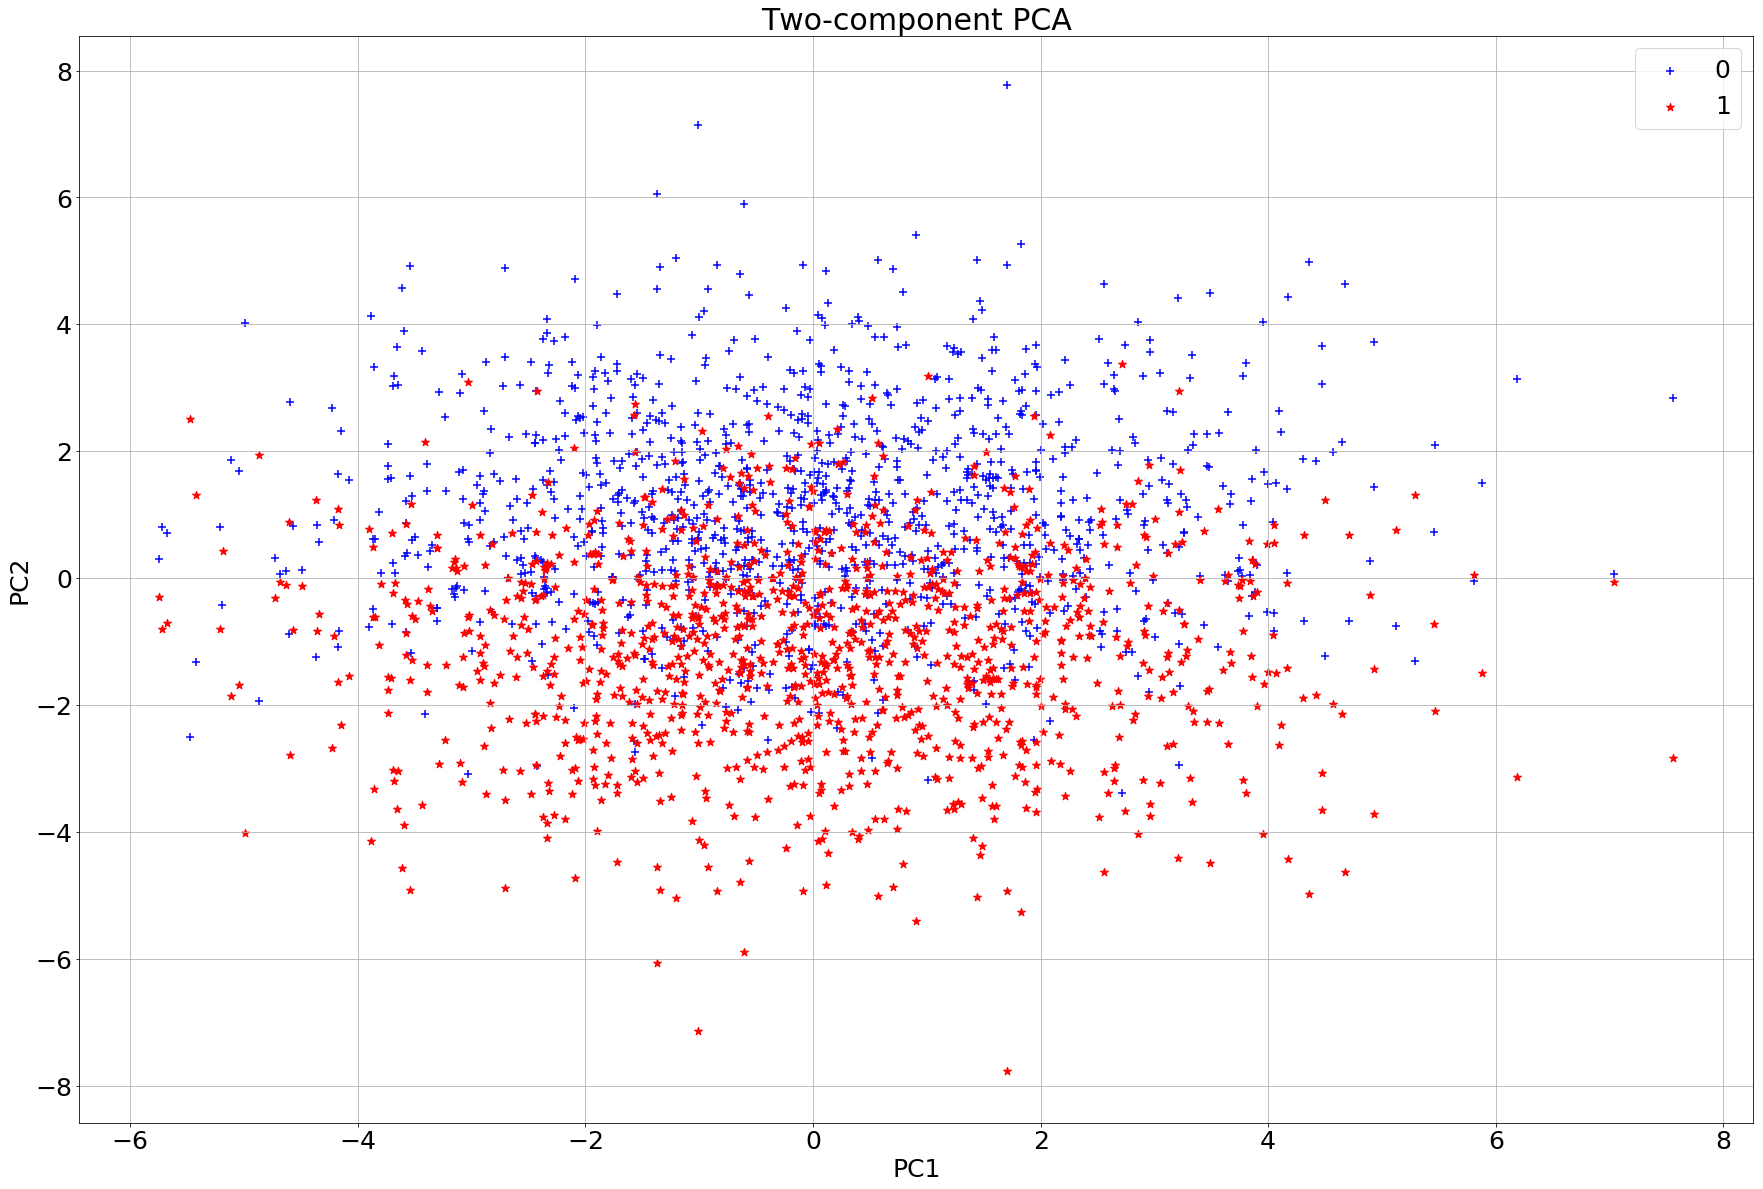

In [81]:
plt.figure(figsize=(30, 20))
matplotlib.rcParams.update({'font.size': 25})
labels = [0, 1]
colors = ['b', 'r']
markers = ['+', '*']
for label, c, m in zip(labels, colors, markers):
    indicesToKeep = Y['Label'] == label
    print('Number of label', label, '=', list(indicesToKeep).count(label))
    plt.scatter(X_PCA.loc[indicesToKeep, 'PCA_1'], X_PCA.loc[indicesToKeep, 'PCA_2'], color=c, marker=m, s=70)
plt.grid(True)
plt.legend(labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Two-component PCA')
plt.show()